In [72]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [73]:
data = pd.read_csv('../data/raw/2025-10-22-qualification_data.csv', sep=',')
data.head()

,AuftragsID,BauteilID,Bauteilbezeichnung,Auftragseingang,Priorität,Auftragsende_SOLL,Arbeitsschritt,Arbeitsschrittbezeichnung,AFO_Start_SOLL,AFO_Ende_SOLL,AFO_Start_IST,AFO_Ende_IST,MaschinenID,Maschinenbezeichnung,Maschinenkapazität
0,95a859f51cf541e0b4aed3a38bb93065,1,Steuerventilmodul,2013-09-20,1,2014-01-01 11:32:00,1,Info,2014-01-01 07:00:00,2014-01-01 07:01:00,2014-01-01 07:00:00,2014-01-01 07:01:00,NaN,NaN,NaN
1,ed4e40cb93c04d0f9bcb8f7ecdc8752a,1,Steuerventilmodul,2013-11-09,1,2014-01-01 11:32:00,1,Info,2014-01-01 07:00:00,2014-01-01 07:01:00,2014-01-01 07:00:00,2014-01-01 07:01:00,NaN,NaN,NaN
2,ce233ad078b9429b8bd40f09100e8ee0,1,Steuerventilmodul,2013-12-30,1,2014-01-01 11:32:00,1,Info,2014-01-01 07:00:00,2014-01-01 07:01:00,2014-01-01 07:00:00,2014-01-01 07:01:00,NaN,NaN,NaN
3,c6b0430e1b7b4f328f0ac195c3070390,1,Steuerventilmodul,2013-10-05,1,2014-01-01 11:32:00,1,Info,2014-01-01 07:00:00,2014-01-01 07:01:00,2014-01-01 07:00:00,2014-01-01 07:01:00,NaN,NaN,NaN
4,5a5b4b41d6d246cfbe862018b557702b,1,Steuerventilmodul,2013-07-27,1,2014-01-01 11:32:00,1,Info,2014-01-01 07:00:00,2014-01-01 07:01:00,2014-01-01 07:00:00,2014-01-01 07:01:00,NaN,NaN,NaN


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1591113 entries, 0 to 1591112
Data columns (total 15 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   AuftragsID                 1591113 non-null  object 
 1   BauteilID                  1591113 non-null  int64  
 2   Bauteilbezeichnung         1591113 non-null  object 
 3   Auftragseingang            1591113 non-null  object 
 4   Priorität                  1591113 non-null  int64  
 5   Auftragsende_SOLL          1591113 non-null  object 
 6   Arbeitsschritt             1591113 non-null  int64  
 7   Arbeitsschrittbezeichnung  1591113 non-null  object 
 8   AFO_Start_SOLL             1591113 non-null  object 
 9   AFO_Ende_SOLL              1591113 non-null  object 
 10  AFO_Start_IST              1591113 non-null  object 
 11  AFO_Ende_IST               1591113 non-null  object 
 12  MaschinenID                1275660 non-null  object 
 13  Maschinenbez

In [75]:
data["AuftragsID"].nunique(), data["BauteilID"].nunique()

# Also im Schnitt ca. 10 Arbeitsschritte pro Auftrag. 

(159924, 3)

In [76]:
# Zeitspalten von Text (object) in echtes Datumsformat (datetime64) umwandeln,
# damit Zeitdifferenzen, Vergleiche und Gruppierungen möglich sind.
# errors="coerce" wandelt fehlerhafte Werte in NaT (Not a Time) statt Fehler auszulösen.
time_cols = ["Auftragseingang", "Auftragsende_SOLL",
              "AFO_Start_SOLL", "AFO_Ende_SOLL",
              "AFO_Start_IST", "AFO_Ende_IST"]

for col in time_cols:
    data[col] = pd.to_datetime(data[col], errors="coerce")

data[time_cols].isna().sum()

Auftragseingang          0
Auftragsende_SOLL        0
AFO_Start_SOLL           0
AFO_Ende_SOLL            0
AFO_Start_IST        57933
AFO_Ende_IST         57933
dtype: int64

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1591113 entries, 0 to 1591112
Data columns (total 15 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   AuftragsID                 1591113 non-null  object        
 1   BauteilID                  1591113 non-null  int64         
 2   Bauteilbezeichnung         1591113 non-null  object        
 3   Auftragseingang            1591113 non-null  datetime64[ns]
 4   Priorität                  1591113 non-null  int64         
 5   Auftragsende_SOLL          1591113 non-null  datetime64[ns]
 6   Arbeitsschritt             1591113 non-null  int64         
 7   Arbeitsschrittbezeichnung  1591113 non-null  object        
 8   AFO_Start_SOLL             1591113 non-null  datetime64[ns]
 9   AFO_Ende_SOLL              1591113 non-null  datetime64[ns]
 10  AFO_Start_IST              1533180 non-null  datetime64[ns]
 11  AFO_Ende_IST               1533180 no

In [78]:
raw = pd.read_csv('../data/raw/2025-10-22-qualification_data.csv', sep=',')

# Zeilen finden, die nach der Umwandlung NaT wurden
mask_invalid = data["AFO_Start_IST"].isna()

# Vergleich der Originalwerte in diesen Zeilen
raw.loc[mask_invalid, "AFO_Start_IST"].unique()[:20]



array(['2100-01-01', '2000-01-01'], dtype=object)

In [79]:
raw.loc[mask_invalid].head(20)

,AuftragsID,BauteilID,Bauteilbezeichnung,Auftragseingang,Priorität,Auftragsende_SOLL,Arbeitsschritt,Arbeitsschrittbezeichnung,AFO_Start_SOLL,AFO_Ende_SOLL,AFO_Start_IST,AFO_Ende_IST,MaschinenID,Maschinenbezeichnung,Maschinenkapazität
1533180,c63f69dbd5de47d8bf5c40ed6a7ff83a,1,Steuerventilmodul,2023-06-14,1,2023-09-22 07:22:00,999,End,2023-09-22 07:21:00,2023-09-22 07:22:00,2100-01-01,2100-01-01,NaN,NaN,NaN
1533181,21ab4278f48e49cc8cb527363f8198ed,1,Steuerventilmodul,2024-05-28,1,2024-08-14 11:32:00,11,Heften-Schweißen,2024-08-14 07:31:00,2024-08-14 08:21:00,2100-01-01,2100-01-01,1,EWM,18.0
1533182,988f8f6b93b74772ba4adbccd499bf39,1,Steuerventilmodul,2024-05-25,2,2024-08-14 12:22:00,11,Heften-Schweißen,2024-08-14 07:31:00,2024-08-14 08:21:00,2100-01-01,2100-01-01,1,EWM,18.0
1533183,2afe839a5d9c45f0ad07ed4e95764dae,1,Steuerventilmodul,2024-05-20,2,2024-08-14 12:22:00,11,Heften-Schweißen,2024-08-14 07:31:00,2024-08-14 08:21:00,2100-01-01,2100-01-01,1,EWM,18.0
1533184,4f1795bc7ee3499ba59860ad40dbd353,2,Schwenkzylinder,2024-07-07,1,2024-08-14 07:12:00,32,Mechanisch Bearbeiten,2024-08-13 11:01:00,2024-08-13 11:51:00,2100-01-01,2100-01-01,2,Fronius,8.0
1533185,205f28a4aa1a4900ad4936b727d47803,2,Schwenkzylinder,2024-04-09,1,2024-08-14 13:12:00,100,Transport,2024-08-14 08:21:00,2024-08-14 08:51:00,2100-01-01,2100-01-01,Transport/Rüsten,NaN,NaN
1533186,28007086afa645a4ab52e9bd13458243,3,Daempfungseinheit,2024-04-09,3,2024-08-14 10:12:00,100,Transport,2024-08-14 08:21:00,2024-08-14 08:51:00,2100-01-01,2100-01-01,Transport/Rüsten,NaN,NaN
1533187,8e1cf4823c2b4402ae2384475e70de0b,3,Daempfungseinheit,2024-07-28,1,2024-08-13 12:42:00,23,Lackieren,2024-08-13 11:21:00,2024-08-13 12:11:00,2100-01-01,2100-01-01,2,Fronius,7.0
1533188,c04c634a6525453191f789def491e9f3,2,Schwenkzylinder,2024-07-21,1,2024-08-13 13:32:00,32,Mechanisch Bearbeiten,2024-08-13 10:11:00,2024-08-13 11:01:00,2100-01-01,2100-01-01,2,Fronius,9.0
1533189,bd999707b6ff4ce1a6a4a916902c17ba,1,Steuerventilmodul,2024-05-22,2,2024-08-14 14:02:00,11,Heften-Schweißen,2024-08-14 07:31:00,2024-08-14 09:11:00,2100-01-01,2100-01-01,1,EWM,18.0


In [80]:
raw.loc[mask_invalid, "AFO_Start_IST"].value_counts().head(10)

AFO_Start_IST
2100-01-01    57932
2000-01-01        1
Name: count, dtype: int64

In [81]:
raw.loc[mask_invalid & (raw["AFO_Start_IST"].astype(str).str.strip() == "2000-01-01")]


,AuftragsID,BauteilID,Bauteilbezeichnung,Auftragseingang,Priorität,Auftragsende_SOLL,Arbeitsschritt,Arbeitsschrittbezeichnung,AFO_Start_SOLL,AFO_Ende_SOLL,AFO_Start_IST,AFO_Ende_IST,MaschinenID,Maschinenbezeichnung,Maschinenkapazität
1556004,56dccdcefabe4c9f94f71f8859e6c35b,2,Schwenkzylinder,2024-08-02,3,2024-10-25 14:52:00,1,Info,2024-10-24 07:00:00,2024-10-24 07:01:00,2000-01-01,2100-01-01,NaN,NaN,NaN


In [82]:
raw = pd.read_csv('../data/raw/2025-10-22-qualification_data.csv', sep=',')

# Zeilen finden, die nach der Umwandlung NaT wurden
mask_invalid = data["AFO_Ende_IST"].isna()

# Vergleich der Originalwerte in diesen Zeilen
raw.loc[mask_invalid, "AFO_Ende_IST"].unique()[:20]


array(['2100-01-01'], dtype=object)

In [83]:
raw.loc[mask_invalid, "AFO_Ende_IST"].value_counts().head(10)

AFO_Ende_IST
2100-01-01    57933
Name: count, dtype: int64

In [84]:
# Zeilen mit fehlenden (NaT) IST-Zeitstempeln entfernen
data_clean = data.dropna(subset=["AFO_Start_IST", "AFO_Ende_IST"]).copy()

# Kontrolle: Wie viele Zeilen wurden entfernt?
removed_rows = len(data) - len(data_clean)
print(f"Entfernte Zeilen: {removed_rows}")
print(f"Verbleibende Zeilen: {len(data_clean)}")

Entfernte Zeilen: 57933
Verbleibende Zeilen: 1533180


In [85]:
data_clean["AFO_Start_IST"].min(), data_clean["AFO_Ende_IST"].max()


(Timestamp('2000-01-01 00:00:00'), Timestamp('2100-01-01 00:00:00'))

In [86]:
placeholder_counts = pd.Series({
    "AFO_Start_IST == 2000-01-01": (data["AFO_Start_IST"] == pd.Timestamp("2000-01-01")).sum(),
    "AFO_Start_IST == 2100-01-01": (data["AFO_Start_IST"] == pd.Timestamp("2100-01-01")).sum(),
    "AFO_Ende_IST == 2000-01-01": (data["AFO_Ende_IST"] == pd.Timestamp("2000-01-01")).sum(),
    "AFO_Ende_IST == 2100-01-01": (data["AFO_Ende_IST"] == pd.Timestamp("2100-01-01")).sum()
})

print(placeholder_counts)

AFO_Start_IST == 2000-01-01     294
AFO_Start_IST == 2100-01-01    4608
AFO_Ende_IST == 2000-01-01        0
AFO_Ende_IST == 2100-01-01     4648
dtype: int64


In [87]:
mask_future = (
    (data["AFO_Start_IST"] == pd.Timestamp("2100-01-01")) |
    (data["AFO_Start_IST"] == pd.Timestamp("2000-01-01")) |
    (data["AFO_Ende_IST"] == pd.Timestamp("2100-01-01"))
)

data_no_future = data.loc[~mask_future].copy()

print(f"Entfernte Zeilen mit 2100-01-01: {mask_future.sum()}")
print(f"Verbleibende Zeilen: {len(data_no_future)}")
print((data_no_future["AFO_Start_IST"] == pd.Timestamp("2100-01-01")).sum())
print((data_no_future["AFO_Start_IST"] == pd.Timestamp("2000-01-01")).sum())
print((data_no_future["AFO_Ende_IST"] == pd.Timestamp("2100-01-01")).sum())

Entfernte Zeilen mit 2100-01-01: 4942
Verbleibende Zeilen: 1586171
0
0
0


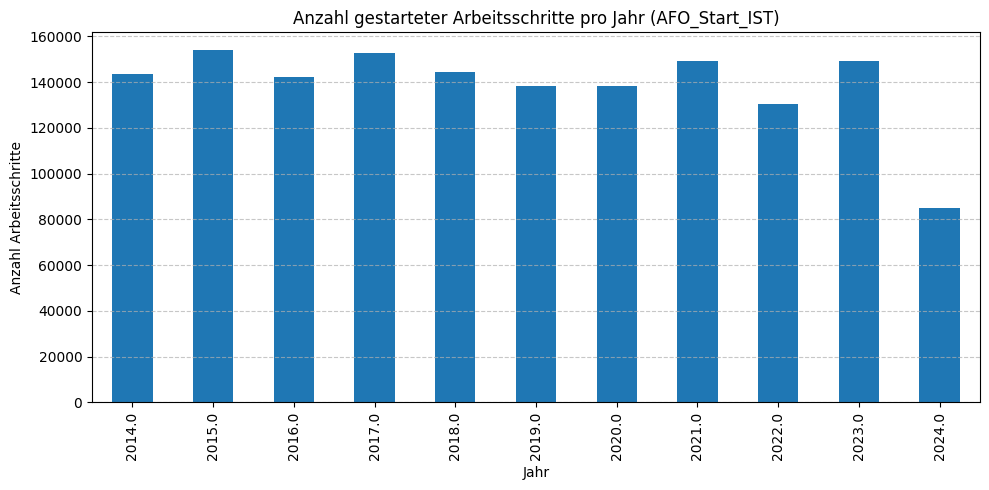

In [88]:
data_no_future["jahr_start"] = data_no_future["AFO_Start_IST"].dt.year

# Gruppieren & zählen
jahres_counts = data_no_future["jahr_start"].value_counts().sort_index()

# Plotten
plt.figure(figsize=(10,5))
jahres_counts.plot(kind="bar")
plt.title("Anzahl gestarteter Arbeitsschritte pro Jahr (AFO_Start_IST)")
plt.xlabel("Jahr")
plt.ylabel("Anzahl Arbeitsschritte")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [89]:
(data_no_future["AFO_Ende_IST"] < data_no_future["AFO_Start_IST"]).sum()

np.int64(0)

In [90]:
(data_no_future["AFO_Ende_SOLL"] < data_no_future["AFO_Start_SOLL"]).sum()

np.int64(0)

In [91]:
data_no_future["AFO_Start_IST"].min(), data_no_future["AFO_Ende_IST"].max()

(Timestamp('2014-01-01 07:00:00'), Timestamp('2024-08-02 15:00:00'))

In [92]:
data_no_future = data_no_future.reset_index(drop=True)

In [93]:
data_no_future.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586171 entries, 0 to 1586170
Data columns (total 16 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   AuftragsID                 1586171 non-null  object        
 1   BauteilID                  1586171 non-null  int64         
 2   Bauteilbezeichnung         1586171 non-null  object        
 3   Auftragseingang            1586171 non-null  datetime64[ns]
 4   Priorität                  1586171 non-null  int64         
 5   Auftragsende_SOLL          1586171 non-null  datetime64[ns]
 6   Arbeitsschritt             1586171 non-null  int64         
 7   Arbeitsschrittbezeichnung  1586171 non-null  object        
 8   AFO_Start_SOLL             1586171 non-null  datetime64[ns]
 9   AFO_Ende_SOLL              1586171 non-null  datetime64[ns]
 10  AFO_Start_IST              1528238 non-null  datetime64[ns]
 11  AFO_Ende_IST               1528238 no

In [94]:

data_no_future["Maschinenbezeichnung"].value_counts().head(10)


Maschinenbezeichnung
Fronius        158375
Deckel Maho    152494
EWM            146247
DMG Mori        87835
Lorch           13689
XXX               793
Name: count, dtype: int64

In [95]:
data_no_future["Bauteilbezeichnung"].value_counts(normalize=True)


Bauteilbezeichnung
Schwenkzylinder      0.564607
Steuerventilmodul    0.402863
Daempfungseinheit    0.032531
Name: proportion, dtype: float64

In [96]:
data_no_future["Arbeitsschrittbezeichnung"].value_counts().head(15)

Arbeitsschrittbezeichnung
Transport                 712306
End                       159567
Info                      155646
Abspannen-Nacharbeiten     82943
Mechanisch Bearbeiten      80924
Aufspannen                 80848
Richten                    80794
Nachschweißen              69563
Schweißen                  68099
Heften-Schweißen           68025
manuelle Nacharbeit        13372
Lackieren                   7043
Verputzen-Aufspannen        7041
Name: count, dtype: int64

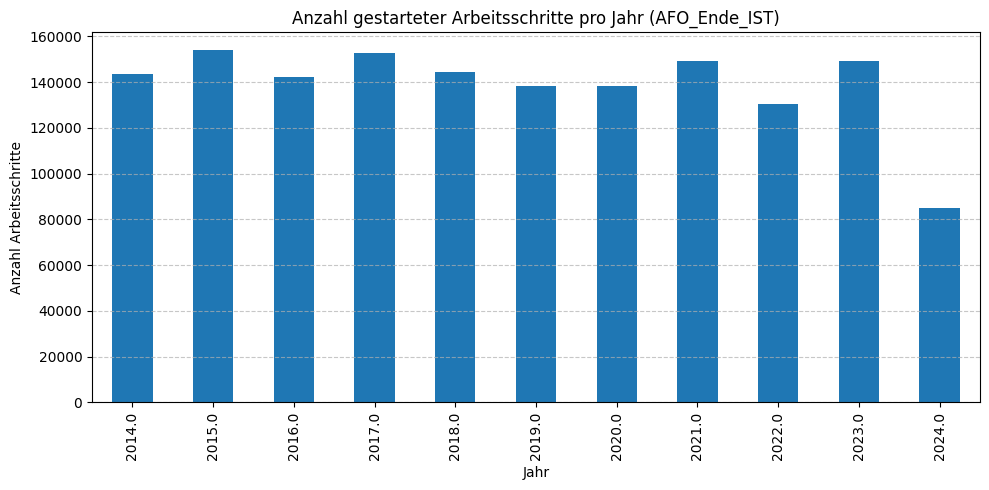

In [97]:
data_no_future["jahr_start"] = data_no_future["AFO_Ende_IST"].dt.year

# Gruppieren & zählen
jahres_counts = data_no_future["jahr_start"].value_counts().sort_index()

# Plotten
plt.figure(figsize=(10,5))
jahres_counts.plot(kind="bar")
plt.title("Anzahl gestarteter Arbeitsschritte pro Jahr (AFO_Ende_IST)")
plt.xlabel("Jahr")
plt.ylabel("Anzahl Arbeitsschritte")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

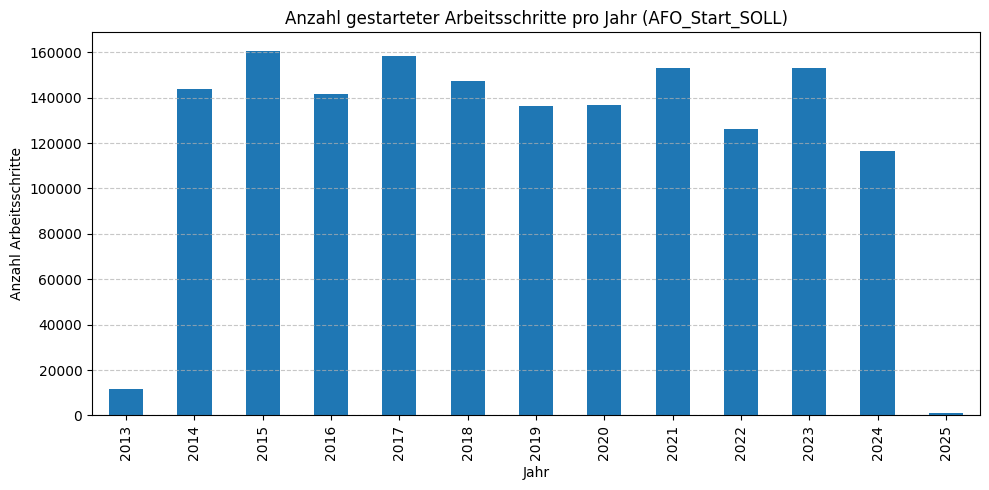

In [98]:
data_no_future["jahr_start"] = data_no_future["AFO_Start_SOLL"].dt.year

# Gruppieren & zählen
jahres_counts = data_no_future["jahr_start"].value_counts().sort_index()

# Plotten
plt.figure(figsize=(10,5))
jahres_counts.plot(kind="bar")
plt.title("Anzahl gestarteter Arbeitsschritte pro Jahr (AFO_Start_SOLL)")
plt.xlabel("Jahr")
plt.ylabel("Anzahl Arbeitsschritte")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

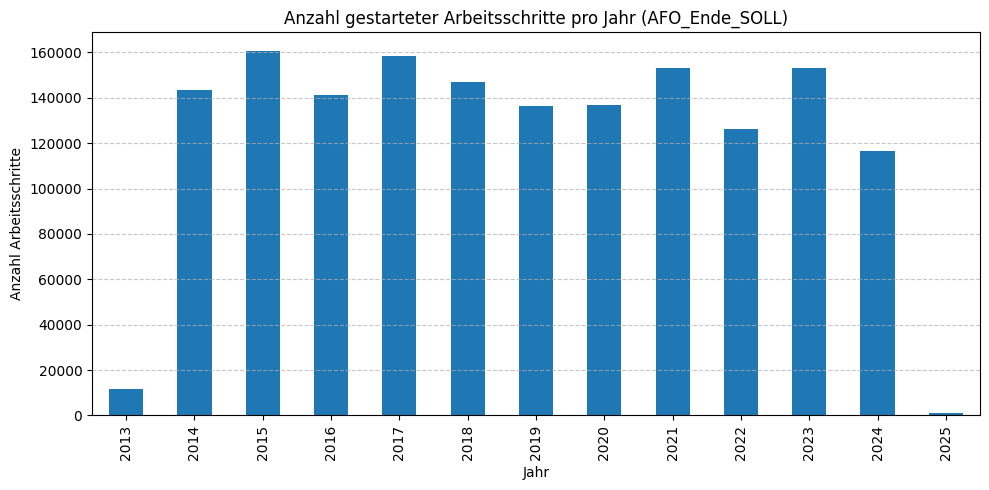

In [99]:
data_no_future["jahr_start"] = data_no_future["AFO_Ende_SOLL"].dt.year

# Gruppieren & zählen
jahres_counts = data_no_future["jahr_start"].value_counts().sort_index()

# Plotten
plt.figure(figsize=(10,5))
jahres_counts.plot(kind="bar")
plt.title("Anzahl gestarteter Arbeitsschritte pro Jahr (AFO_Ende_SOLL)")
plt.xlabel("Jahr")
plt.ylabel("Anzahl Arbeitsschritte")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [100]:
data_no_future.to_csv('../data/processed/data_cleaned_timestamp_1.csv', index=False)